### Exploratory Data Analysis ###


Batch import libraries

In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import re
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
stops = set(stopwords.words('english'))
from nltk.stem.porter import PorterStemmer
p_stemmer = PorterStemmer()
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV 
%matplotlib inline

In [2]:
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer

In [3]:
from sklearn.preprocessing import LabelEncoder

Import the dataset


In [ ]:
# import pandas as pd
# import glob, os
 
# os.chdir("C:/Folder")
# results = pd.DataFrame([])
 
# for counter, file in enumerate(glob.glob("datayear*")):
#     namedf = pd.read_csv(file, skiprows=0, usecols=[1,2,3])
#     results = results.append(namedf)
 
# results.to_csv('C:/combinedfile.csv')

In [4]:
df=pd.read_csv('Pol03-06-2018.csv')

df.shape

(3382, 18)

Perform EDA

1. Examine the the two predictor variables 

/Users/admin/anaconda3/envs/dsi/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


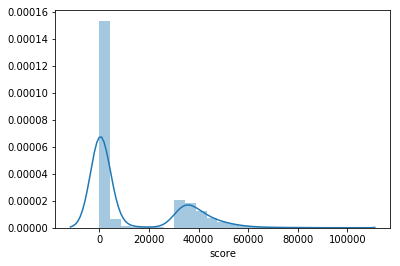

In [6]:
sns.distplot(df['score']);

In [ ]:
sns.boxplot(x=df["score"]);

In [ ]:
sns.distplot(df['comms_num']);

In [ ]:
sns.boxplot(x=df["comms_num"]);

In [ ]:
sns.distplot(df['post_duration']);

There are a lot of outliers so need to log transform


In [ ]:
#log transform the targets:
df["comms_num_log"] = np.log1p(df["comms_num"])
df["score_log"] = np.log1p(df["score"])


In [ ]:
sns.distplot(df['score_log']);

In [ ]:
#clearly the distributions are very different so we will check for correlation 

In [ ]:
df.info()

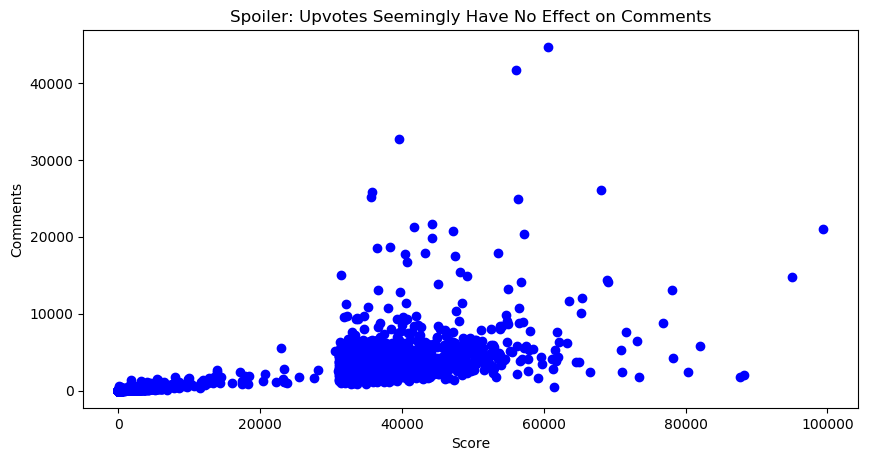

In [7]:
#Checking for a relationship between comments and upvotes
plt.figure(figsize=(10, 5), dpi=100, facecolor='w', edgecolor='k')
plt.scatter(df['score'],df["comms_num"], c='b')
plt.xlabel('Score')
plt.ylabel('Comments')
plt.title("Spoiler: Upvotes Seemingly Have No Effect on Comments");

In [ ]:
#high correlation so i will be attempting to  predict without these two for fun


In [ ]:
df.score.describe()

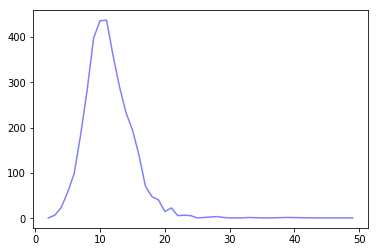

In [8]:
df['word_count'].value_counts().sort_index().plot(color='b', alpha=.5);
# df[df['subreddit'] == 'Conservative']['Word_Count'].value_counts().sort_index().plot(color='r', alpha=.5);
# df[df['subreddit'] == 'politics']['Word_Count'].value_counts().sort_index().plot(color='k', alpha=.5)

In [ ]:
df['sent_sia'].value_counts().head(10).plot(kind='bar', alpha=.5);


In [ ]:
df['sentiment'].value_counts().head(10).plot(kind='bar', alpha=.5);


In [9]:
df['sent_label'] = 'neutral'
df.loc[df['sentiment'] > 0.1, 'sent_label'] = 'positive'
df.loc[df['sentiment'] < -0.1, 'sent_label'] = 'negative'
df.head(3)
    

,body,comms_num,created,domain,id,score,subreddit,time_retrieved,title,time,time_retrieved.1,post_duration,time_hm,day,word_count,sent_sia,sentiment,subjectivity,sent_label
0,NaN,541,1.527738e+09,abcnews.go.com,8nbldk,1519,politics,2018-05-30 22:07:10.938189+00:00,Melania Trump Not Seen by Public in 20 Days,2018-05-31 03:45:37.000000,2018-05-30 22:07:10.938189,18.0,3,Sun,9,-0.68,0.00,0.07,neutral
1,NaN,124,1.527717e+09,thinkprogress.org,8n8qnw,2600,politics,2018-05-30 22:07:10.938189+00:00,The ‘Don’t Vote Early’ campaign and the pro-Tr...,2018-05-30 21:53:16.000000,2018-05-30 22:07:10.938189,0.0,21,Sun,13,0.66,-0.03,0.37,neutral
2,NaN,31,1.527737e+09,theguardian.com,8nbemi,551,politics,2018-05-30 22:07:10.938189+00:00,Ambien manufacturer responds to Roseanne blami...,2018-05-31 03:22:42.000000,2018-05-30 22:07:10.938189,19.0,3,Sun,25,-0.15,0.00,0.00,neutral


In [10]:
df['sent_sia_label'] = 'neutral'
df.loc[df['sent_sia'] > 0.1, 'sent_sia_label'] = 'positive'
df.loc[df['sent_sia'] < -0.1, 'sent_sia_label'] = 'negative'
df.head(3)

,body,comms_num,created,domain,id,score,subreddit,time_retrieved,title,time,time_retrieved.1,post_duration,time_hm,day,word_count,sent_sia,sentiment,subjectivity,sent_label,sent_sia_label
0,NaN,541,1.527738e+09,abcnews.go.com,8nbldk,1519,politics,2018-05-30 22:07:10.938189+00:00,Melania Trump Not Seen by Public in 20 Days,2018-05-31 03:45:37.000000,2018-05-30 22:07:10.938189,18.0,3,Sun,9,-0.68,0.00,0.07,neutral,negative
1,NaN,124,1.527717e+09,thinkprogress.org,8n8qnw,2600,politics,2018-05-30 22:07:10.938189+00:00,The ‘Don’t Vote Early’ campaign and the pro-Tr...,2018-05-30 21:53:16.000000,2018-05-30 22:07:10.938189,0.0,21,Sun,13,0.66,-0.03,0.37,neutral,positive
2,NaN,31,1.527737e+09,theguardian.com,8nbemi,551,politics,2018-05-30 22:07:10.938189+00:00,Ambien manufacturer responds to Roseanne blami...,2018-05-31 03:22:42.000000,2018-05-30 22:07:10.938189,19.0,3,Sun,25,-0.15,0.00,0.00,neutral,negative


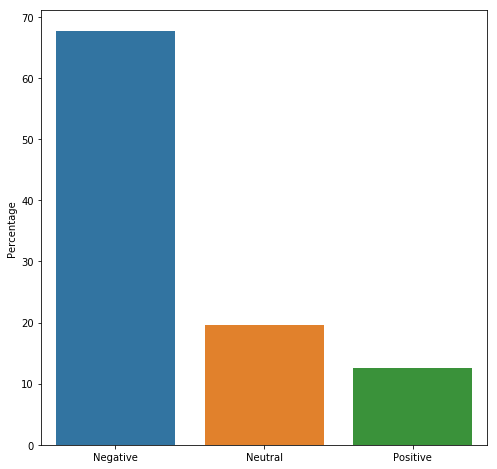

In [11]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df.sent_label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()
    

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df.sent_sia_label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

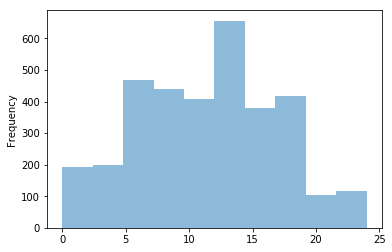

In [12]:
df['post_duration'].plot(kind='hist', alpha=.5);

In [ ]:
# df[df['subreddit'] == 'Liberal']['domain'].value_counts().head(10).plot(kind='bar')
# plt.xticks(rotation=70);

In [ ]:
# df[df['subreddit'] == 'politics']['domain'].value_counts().head(10).plot(kind='bar')
# plt.xticks(rotation=70);

In [ ]:
# df[df['subreddit'] == 'politics']['Word_Count'].value_counts().sort_index().plot(color='k', alpha=.5)

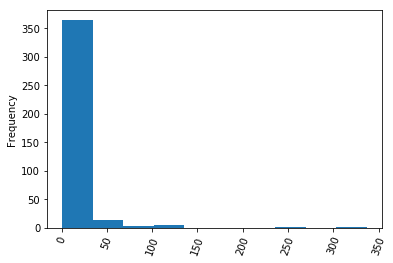

In [13]:
df['domain'].value_counts().plot(kind='hist')
plt.xticks(rotation=70);

most of the frequncy is from less than 25 sites 

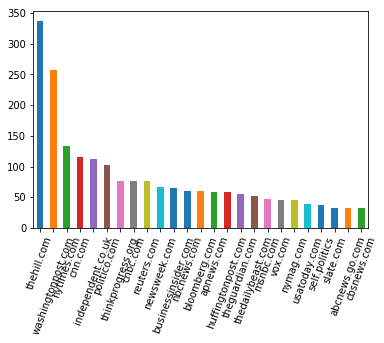

In [14]:
df['domain'].value_counts().head(25).plot(kind='bar')
plt.xticks(rotation=70);

## Feature Engineering 

Seperating the categorical and numerical variable

In [15]:
df.select_dtypes(include=['O']).columns.values


array(['body', 'domain', 'id', 'subreddit', 'time_retrieved', 'title',
       'time', 'time_retrieved.1', 'day', 'sent_label', 'sent_sia_label'],
      dtype=object)

Selecting the domains to dummy

In [38]:
DD= df['domain'].value_counts().head(35).index.tolist()


df['domain_d'] = [type_ if type_ in DD
                      else "OTHER" for type_ in df['domain']]

df['domain_d'].value_counts()

In [41]:
cat_features = df.select_dtypes(include = ["object"]).columns
num_features = df.select_dtypes(exclude = ["object"]).columns
df_num = df[num_features]
df_cat = df[cat_features]
print("Numerical features : " + str(len(num_features)))
print(df.select_dtypes(exclude=['O']).columns.values)
print("Categorical features : " + str(len(cat_features)))
print((df.select_dtypes(include=['O']).columns.values))
# train_num = train[numerical_features]
# train_cat = train[categorical_features]

Numerical features : 9
['comms_num' 'created' 'score' 'post_duration' 'time_hm' 'word_count'
 'sent_sia' 'sentiment' 'subjectivity']
Categorical features : 15
['body' 'domain' 'id' 'subreddit' 'time_retrieved' 'title' 'time'
 'time_retrieved.1' 'day' 'sent_label' 'sent_sia_label' 'domain_d'
 'comments_label' 'score_label' 'text']


Seperating the target variable

I will be using both *Number of Comments* and *Scores* as the target variable

Methodology: Low: below median High: above median  
             Median was chosen due to the presense of large number fo outliers in both target variables 

In [42]:
print('Scores')
print("Mean is {:0.2f} and the Median is {:0.2f}".format(np.mean(df.score),np.median(df.score)))
print('Number of coments')
print("Mean is {:0.2f} and the Median is {:0.2f}".format(np.mean(df.comms_num),np.median(df.comms_num)))



Scores
Mean is 12540.25 and the Median is 375.00
Number of coments
Mean is 1313.90 and the Median is 40.00


In [43]:
df['comments_label'] = np.where(df['comms_num']>np.median(df.comms_num), 'High', 'Low')
df['score_label'] = np.where(df['score']>np.median(df.score), 'High', 'Low')
# from sklearn.preprocessing import LabelEncoder


In [ ]:
df['comments_label'].value_counts()

## To NLP or not to NLP 

**Non-NLP**
**Scores**


In [44]:
print("Numerical features : " + str(len(num_features)))
print(df.select_dtypes(exclude=['O']).columns.values)
X_test_all

Numerical features : 9
['comms_num' 'created' 'score' 'post_duration' 'time_hm' 'word_count'
 'sent_sia' 'sentiment' 'subjectivity']
Categorical features : 15
['body' 'domain' 'id' 'subreddit' 'time_retrieved' 'title' 'time'
 'time_retrieved.1' 'day' 'sent_label' 'sent_sia_label' 'domain_d'
 'comments_label' 'score_label' 'text']


In [27]:
#non_nlp variables 
X = df[['word_count','sentiment','subjectivity','domain','title']]

# y=df_combined['subreddit']
# transform the label 
y_cl = LabelEncoder().fit_transform(df['score_label'])
y_cm = LabelEncoder().fit_transform(df['comments_label'])

In [25]:
y.sum()

1691

Dummy time


In [45]:
X_d = pd.get_dummies(X, columns=['domain'], drop_first=True)

In [47]:
# X_d_a = pd.get_dummies(X, columns=['domain_d'], drop_first=True)

In [48]:
 X_d.shape

(3382, 389)

In [49]:
df['text']=df['title'].str.replace('\d+', '')
# df_lib_con.title = df_lib_con.title.str.replace('\d+', '')

In [50]:
def process_lem(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    tokens = word_tokenize(text)
    
    lemmer = WordNetLemmatizer()
    stop_words = stopwords.words("english")
    return ' '.join([lemmer.lemmatize(word) for word in tokens if not word in stop_words])

In [51]:
df['text'] = [process_lem(text) for text in df['text']]

In [52]:
df.head(2)

,body,comms_num,created,domain,id,score,subreddit,time_retrieved,title,time,...,word_count,sent_sia,sentiment,subjectivity,sent_label,sent_sia_label,domain_d,comments_label,score_label,text
0,NaN,541,1.527738e+09,abcnews.go.com,8nbldk,1519,politics,2018-05-30 22:07:10.938189+00:00,Melania Trump Not Seen by Public in 20 Days,2018-05-31 03:45:37.000000,...,9,-0.68,0.00,0.07,neutral,negative,abcnews.go.com,High,High,melania trump seen public day
1,NaN,124,1.527717e+09,thinkprogress.org,8n8qnw,2600,politics,2018-05-30 22:07:10.938189+00:00,The ‘Don’t Vote Early’ campaign and the pro-Tr...,2018-05-30 21:53:16.000000,...,13,0.66,-0.03,0.37,neutral,positive,thinkprogress.org,High,High,vote early campaign pro trump effort suppress ...


In [54]:
#non_nlp variables 
X_d = df[['word_count','sentiment','subjectivity','domain_d','text','title']]
X_d_a = df[['word_count','sentiment','subjectivity','domain','title','text']]
# y=df_combined['subreddit']
# transform the label 
y_cl = LabelEncoder().fit_transform(df['comms_num'])
y_s =LabelEncoder().fit_transform(df['score'])

In [ ]:
# #non_nlp variables 
# X_d = df['text']
# # y=df_combined['subreddit']
# # transform the label 
# y_cl = LabelEncoder().fit_transform(df['score_label'])

Comments

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_d, y_cl, test_size=0.3, random_state=42)


In [56]:

tvec = TfidfVectorizer(stop_words=stopwords.words('english'),
                                 lowercase=True)

In [57]:
X_train_matrix = tvec.fit_transform(X_train['text'])
X_test_matrix = tvec.transform(X_test['text'])

In [59]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(max_depth=10, n_estimators=5)

In [60]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()

In [61]:
forest.fit(X_train_matrix, y_train)
forest.score(X_test_matrix, y_test)

0.023645320197044337

In [ ]:
X_train(5)

In [62]:
lr.fit(X_train_matrix, y_train)
lr.score(X_test_matrix, y_test)

0.03251231527093596

In [63]:
X_train_df = pd.DataFrame(X_train_matrix.todense(),
                         columns=tvec.get_feature_names(),
                         index=X_train.index)

In [64]:
np.random.choice(tvec.get_feature_names(), 50) # 50 random words from the vocabulary

array(['filmmaker', 'durbin', 'criticizes', 'showdown', 'alt', 'frequent',
       'little', 'ralph', 'darn', 'item', 'suppress', 'explanation',
       'button', 'brothel', 'zero', 'janz', 'wanted', 'passed', 'sends',
       'drug', 'blasted', 'model', 'face', 'electoral', 'network',
       'requiring', 'anger', 'stole', 'nd', 'exaggerate', 'salvador',
       'believed', 'cbo', 'solar', 'street', 'harvard', 'flint', 'brace',
       'lawful', 'idaho', 'gate', 'amidst', 'spicer', 'facing', 'map',
       'disgraced', 'plank', 'highly', 'career', 'deposition'],
      dtype='<U20')

In [ ]:
X_train_df.head(5)

In [65]:
X_test_df = pd.DataFrame(X_test_matrix.todense(),
                        columns=tvec.get_feature_names(),
                        index=X_test.index)

In [66]:
X_train_all = pd.concat([X_train_df, X_train.drop('title', axis=1)], axis=1)
X_test_all = pd.concat([X_test_df, X_test.drop('title', axis=1)], axis=1)

In [82]:
X_train_all.head(4)


,abbott,abc,abe,abhorrent,ability,abject,able,abolish,abolished,abortion,...,younger,youth,zero,zeroing,zinke,zte,zuckerberg,word_count,sentiment,subjectivity
900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.0,0.0
422,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,0.0,0.0
887,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,0.0,0.0
1825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11,0.0,0.0


In [71]:
y_train.shape

(2367,)

In [77]:
# print("Categorical features : " + str(len(cat_features)))
print((X_train_all.select_dtypes(include=['O']).columns.values))

['domain_d' 'text']


In [80]:
X_train_all= X_train_all.drop(['domain_d','text'],axis=1)
X_test_all = X_test_all.drop(['domain_d','text'],axis=1)

In [81]:
lr.fit(X_train_all, y_train)
print('Log Reg')
print(lr.score(X_train_all, y_train))
print(lr.score(X_test_all, y_test))

forest.fit(X_train_all, y_train)
print('\n Random Forest')
print(forest.score(X_train_all, y_train))
print(forest.score(X_test_all, y_test))

Log Reg
0.2817912970004225
0.029556650246305417

 Random Forest
0.059146599070553446
0.034482758620689655


TTS


In [ ]:
# def seperate_df(df):    
#     df.columns = [x.lower() for x in df.columns]
#     df_LibCon=df[(df['subreddit']=='Liberal') | (df['subreddit']=='Conservative')] 
#     df_pol=df[(df['subreddit']=='politics')]
#     TodaysDate = time.strftime("%d-%m-%Y")
#     csv_name_lb = "LibCon"+TodaysDate +".csv"
#     csv_name_pol = "Pol"+TodaysDate +".csv"
#     df_LibCon.to_csv(csv_name_lb,index=False)
#     df_pol.to_csv(csv_name_pol,index=False)
#     print(csv_name_lb)
#     print(csv_name_pol)
#     return

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_d,y,test_size=0.3, random_state=42)

predict just using domain

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(max_depth=10, n_estimators=5)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()

In [ ]:
lr.fit(X_train, y_train)
print('Log Reg')
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

forest.fit(X_train, y_train)
forest.score(X_test, y_test)
print('\n Random Forest')
print(forest.score(X_train, y_train))
print(forest.score(X_test, y_test))

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [83]:
from tpot import TPOTClassifier

In [84]:
tpot=TPOTClassifier()

In [85]:
tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2)
tpot.fit(X_train_all, y_train)
print(tpot.score(X_test_all, y_test))
tpot.export('tpot_pipeline.py')



TPOT closed prematurely. Will use the current best pipeline.


RuntimeError: A pipeline has not yet been optimized. Please call fit() first.

With all domains

In [ ]:
#non_nlp variables 
X_d = df[['word_count','sentiment','subjectivity','domain','post_duration']]
# y=df_combined['subreddit']
# transform the label 
y_cl = LabelEncoder().fit_transform(df['comms_num_log'])

In [ ]:
X_d = pd.get_dummies(X_d, columns=['domain'], drop_first=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_d,y_cl,test_size=0.3, random_state=42)

Dummy time


In [ ]:
X_d.head(3)

In [ ]:
X_d.shape

In [ ]:
y_cl.shape

In [ ]:
lr.fit(X_train, y_train)
print('Log Reg')
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

forest.fit(X_train, y_train)
forest.score(X_test, y_test)
print('\n Random Forest')
print(forest.score(X_train, y_train))
print(forest.score(X_test, y_test))

In [ ]:
tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_pipeline_nc_ad.py')

now with number of comments

In [ ]:
y_nm = LabelEncoder().fit_transform(df['comments_label'])

In [ ]:
df['comments_label'].describe()

In [ ]:
y_nm.sum()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_d,y_nm,test_size=0.3, random_state=42)

In [ ]:
lr.fit(X_train, y_train)
print('Log Reg')
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

forest.fit(X_train, y_train)
forest.score(X_test, y_test)
print('\n Random Forest')
print(forest.score(X_train, y_train))
print(forest.score(X_test, y_test))

In [ ]:
tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_pipeline_nc.py')

In [ ]:
y_nm = LabelEncoder().fit_transform(df['comments_label'])

In [ ]:
df['comments_label'].describe()

In [ ]:
y_nm.sum()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_d,y_nm,test_size=0.3, random_state=42)

In [ ]:
lr.fit(X_train, y_train)
print('Log Reg')
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

forest.fit(X_train, y_train)
forest.score(X_test, y_test)
print('\n Random Forest')
print(forest.score(X_train, y_train))
print(forest.score(X_test, y_test))

In [ ]:
tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_pipeline_nc.py')

## NLP 



In [ ]:
df['text']=df['title'].str.replace('\d+', '')
# df_lib_con.title = df_lib_con.title.str.replace('\d+', '')

In [ ]:
df.head(2).T

In [ ]:
def process_lem(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    tokens = word_tokenize(text)
    
    lemmer = WordNetLemmatizer()
    stop_words = stopwords.words("english")
    return ' '.join([lemmer.lemmatize(word) for word in tokens if not word in stop_words])

In [ ]:
df['text'] = [process_lem(text) for text in df['text']]

In [ ]:
#non_nlp variables 
X_d_a = df[['word_count','sentiment','subjectivity','domain','post_duration','text']]
# y=df_combined['subreddit']
# transform the label 
y_cn = LabelEncoder().fit_transform(df['comms_num'])
y_cl =LabelEncoder().fit_transform(df['score'])

In [ ]:
# #non_nlp variables 
# X_d = df['text']
# # y=df_combined['subreddit']
# # transform the label 
# y_cl = LabelEncoder().fit_transform(df['score_label'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_d_a, y_cn, test_size=0.3, random_state=42)


In [ ]:

tvec = TfidfVectorizer(stop_words=stopwords.words('english'),
                                 lowercase=True)

In [ ]:
X_train_matrix = tvec.fit_transform(X_train['text'])
X_test_matrix = tvec.transform(X_test['text'])

In [ ]:
X_train(5)

In [ ]:
# tvec = TfidfVectorizer(stop_words='english')

X_train_matrix = tvec.fit_transform(X_train['text'])
X_test_matrix = tvec.transform(X_test['text'])

In [ ]:
lr.fit(X_train_matrix, y_train)
lr.score(X_test_matrix, y_test)

In [ ]:
forest.fit(X_train_matrix, y_train)
forest.score(X_test_matrix, y_test)

In [ ]:
X_train_df = pd.DataFrame(X_train_matrix.todense(),
                         columns=tvec.get_feature_names(),
                         index=X_train.index)

In [ ]:
np.random.choice(tvec.get_feature_names(), 50) # 50 random words from the vocabulary

In [ ]:
X_train_df.head(5)

In [ ]:
X_test_df = pd.DataFrame(X_test_matrix.todense(),
                        columns=tvec.get_feature_names(),
                        index=X_test.index)

In [ ]:
tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2)
tpot.fit(X_train_df, y_train)
print(tpot.score(X_test_df, y_test))
tpot.export('tpot_pipeline_nlp.py')

In [ ]:
X_train_all = pd.concat([X_train_df, X_train.drop( axis=1)], axis=1)
X_test_all = pd.concat([X_test_df, X_test.drop(axis=1)], axis=1)

In [ ]:
df_lib_con.head(5)

In [ ]:
X_test.shape

In [ ]:
X_train.shape

In [ ]:
y_test.shape

In [ ]:
y_train.shape

In [ ]:
# df_lib_con.title = df_lib_con.title.str.replace('\d+', '')

Now, we'll create our `X_train_matrix` using _only the text_ column of X_train:

In [ ]:
# transform the words 
tokenizer = RegexpTokenizer("[\w']+")
from string import punctuation

def process_text(string,stem=False):    #stem=False
    def strip_punctuation(string):
        return ''.join(c for c in string if c not in punctuation)
    tokens = tokenizer.tokenize(string) 
    if stem:
            stemmer = PorterStemmer()
            tokens = [stemmer.stem(t) for t in tokens]
            tokens = [x for x in tokens if len(x)>1] # remove single charactors Credit: Ben Shaver
    else:
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(t) for t in tokens]
        tokens = [x for x in tokens if len(x)>1]
        
    return tokens
 
 

 


In [ ]:

tvec = TfidfVectorizer(stop_words=stopwords.words('english'),
                                 lowercase=True,max_features=1000)

In [ ]:
X_train_matrix = tvec.fit_transform(X_train['text'])

In [ ]:
X_test_matrix  = tvec.transform(X_test['text'])

In [ ]:
X_train_matrix.todense()

In [ ]:
X1_T=X_train

In [ ]:
X_train.info()

In [ ]:
X1_T.info()

We'll do the same with `X_test`, and the make dataframes from these matrices, as before:

In [ ]:
X_test_matrix

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest = RandomForestClassifier(max_depth=10, n_estimators=5)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr=LogisticRegression()

In [ ]:
lr.fit(X_train_matrix, y_train)
lr.score(X_test_matrix, y_test)

In [ ]:
forest.fit(X_train_matrix, y_train)
forest.score(X_test_matrix, y_test)

In [ ]:
X_train.shape

In [ ]:
X_train_df = pd.DataFrame(X_train_matrix.todense(),
                     columns=tvec.get_feature_names(),
                         index=X_train.index)

In [ ]:
X_train_df.shape

In [ ]:
np.random.choice(tvec.get_feature_names(),50)

In [ ]:
X_train_df.head(10)

In [ ]:
X_test_df = pd.DataFrame(X_test_matrix.todense(),
                     columns=tvec.get_feature_names(),
                        index=X_test.index)

In [ ]:
assert X_train.index.all() == X_train_df.index.all()
assert X_test.index.all() == X_test_df.index.all()


In [ ]:
X_test_df.shape

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# ss  = StandardScaler()
lr  = LogisticRegression()
knn = KNeighborsClassifier()
dt  = DecisionTreeClassifier(random_state=42)
bag = BaggingClassifier(random_state=42)
rf  = RandomForestClassifier(random_state=42)
adb = AdaBoostClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
svm = SVC()

# pipe_lr  = Pipeline([
#     ('ss', ss),
#     ('lr', lr)
# ])
# pipe_knn = Pipeline([
#     ('ss', ss),
#     ('knn', knn)
# ])
# pipe_dt  = Pipeline([
#     ('ss', ss),
#     ('dt', dt)
# ])
# pipe_bag = Pipeline([
#     ('ss', ss),
#     ('bag', bag)
# ])
# pipe_rf  = Pipeline([
#     ('ss', ss),
#     ('rf', rf),
# ])
# pipe_adb = Pipeline([
#     ('ss', ss),
#     ('adb', adb)
# ])
# pipe_svr = Pipeline([
#     ('ss', ss),
#     ('svr', svr)
# ])





params_lr  = {
    
}
params_knn = {
    'n_neighbors': range(5, 15),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
params_dt  = {
    'splitter': ['best', 'random'],
    'min_samples_split': ([2,5,20,50]),
    'max_depth':([2,3,4,5])
}
params_bag = {
    'n_estimators': range(5, 50),
    'n_jobs': [-1, 1, 2]
}
params_rf  = {
    'n_estimators': range(5, 50),
    'max_features': ['auto', 'sqrt', 'log2'],
    'n_jobs': (-1, 1, 2)
}
params_adb = {
    'n_estimators': [25, 50, 75, 100]
}
params_svm = {
    'C': [0.01, 0.1, 1, 2],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma' : np.logspace(-5, 2, 20),
    'class_weight':['balanced',None]
}

params_gb ={'learning_rate': [0.1, 0.05, 0.02, 0.01],
              'max_depth': [4, 6, 8],
              'min_samples_leaf': [20, 50,100,150],
              'max_features': [1.0, 0.3, 0.1] 
             
}


grid_lr  = GridSearchCV(estimator=lr,
                        param_grid=params_lr,
                        cv=5)
# grid_knn = GridSearchCV(estimator=knn,
#                         param_grid=params_knn,
#                         cv=5)
grid_dt  = GridSearchCV(estimator=dt,
                        param_grid=params_dt,
                        cv=5)
grid_bag = GridSearchCV(estimator=bag,
                        param_grid=params_bag,
                        cv=5)
grid_rf  = GridSearchCV(estimator=rf,
                        param_grid=params_rf,
                        cv=5)
grid_adb = GridSearchCV(estimator=adb,
                        param_grid=params_adb,
                        cv=5)
# grid_svm = GridSearchCV(estimator=svm,
#                         param_grid=params_svm,
#                         cv=5)
grid_gb = GridSearchCV(estimator=gb,
                        param_grid=params_gb,
                        cv=5)
pipes    = [
    grid_lr, 
    grid_gb, 
    grid_dt, 
    grid_bag, 
    grid_rf, 
    grid_adb,
#     grid_knn,
#     grid_svm,
]

pipe_idx = {0: 'Log Regression', 1:'Gradient Boost', 
            2: 'Decision Tree', 3: 'Bagging', 
            4: 'Random Forest', 5: 'Adaboost',
#             6: 'KNeighbors',
#             7: 'Support Vector Machine'  
           }
for idx, pipe in enumerate(pipes):
    pipe.fit(X_train_matrix, y_train)
    print('\nScore: %s' % pipe_idx[idx])
    print('TrainScore :')
    print(pipe.score(X_train_matrix, y_train))
    print('TestScore :')
    print(pipe.score(X_test_matrix, y_test))
    print('Best params: %s' % pipe.best_params_)

In [ ]:
# X_train_df.index.duplicated().sum()

In [ ]:
# X_train_df[X_train_df.index.duplicated(keep=False)]

In [ ]:
# X_test_df[X_test_df.index.duplicated()]

In [ ]:
# X_test_df.reset_index().drop_duplicates('index').set_index('index')

In [ ]:
# X_test_df[~X_test_df.duplicated()]

In [ ]:
# X_test_df[X_test_df.duplicated()]


In [ ]:
df_lib_con.shape

In [ ]:
X_train_df.shape

In [ ]:
X_test.shape

Now we can `join` our two dataframes together, and drop the original `headline_text` column. We have two dataframes with tfidf scores *and* some other original numerical column:

In [ ]:
print(X_train.iloc[0,])


In [ ]:
X_test_1  = X_test.join(X_test_df,lsuffix='target')#.drop('title', axis=1)main_df = main_df.join(df, lsuffix=abbv)

In [ ]:
X_test_1.shape

In [ ]:
X_train = X_train.join(X_train_df).drop('title', axis=1)

X_test  = X_test.join(X_test_df).drop('title', axis=1)

In [ ]:
X1_T.shape

In [ ]:
type(X_test_1)

In [ ]:
X_train_1[X_train_1.index.duplicated(keep=False)]

In [ ]:
X_train_1 = X_train_1drop.duplicated(keep='last')]

In [ ]:
X_train_1.shape

In [ ]:
X_train_1.head(5)


In [ ]:
X_train_df.head(5)

In [ ]:
y_train

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
forest.fit(X_train_1, y_train)
forest.score(X_test_1, y_test)

In [ ]:
log_reg.score(Xtest_count, y_test)

In [ ]:
gb = GradientBoostingClassifier(random_state=42)

In [ ]:
gb.fit(Xtrain_count, y_train)
print(gb.score(Xtrain_count, y_train))
print(gb.score(Xtest_count, y_test))

In [ ]:
df.info()

In [ ]:
forest = RandomForestClassifier(max_depth = 10, n_estimators=5, random_state=42)
forest.fit(Xtrain_count, y_train)
print(forest.score(Xtrain_count, y_train))
print(forest.score(Xtest_count, y_test))


Score: Log Regression
TrainScore :
0.9181969949916527
TestScore :
0.6839176405119644
Best params: {}

Score: Gradient Boost
TrainScore :
0.7228714524207012
TestScore :
0.6360601001669449
Best params: {'learning_rate': 0.1, 'max_depth': 8, 'max_features': 0.3, 'min_samples_leaf': 20}

Score: Decision Tree
TrainScore :
0.6399554813578185
TestScore :
0.6054535336672231
Best params: {'max_depth': 5, 'min_samples_split': 2, 'splitter': 'best'}

Score: Bagging
TrainScore :
0.996661101836394
TestScore :
0.6633277685030606
Best params: {'n_estimators': 41, 'n_jobs': -1}

As we can see the word analysis of the title is not enough to accurately predict whether the post is liberal or conservative 

#introduce another variable: domain name 

In [ ]:
df_

In [ ]:
gb = GradientBoostingClassifier(random_state=42)

In [ ]:
adb = AdaBoostClassifier(random_state=42)
svm = SVC()

In [ ]:
knn.get_params().keys()

In [ ]:
# def word_prep(string):
#     string=string.lower()
#     print(string)
#     string_t=tokenizer.tokenize(string.lower())
#     print(string_t)
#     string_s = [w for w in string_t if not w in stops]
#     print(string_s)
#     string_l = [lemmatizer.lemmatize(i) for i in string_s]
# #     string_l=[p_stemmer.stem(i) for i in string_s]
#     print(string_l)
#     return string_l

## Two Choices: Domain name or title analysis ##

In [ ]:
df_lib_con
